# SSD-MobileNet model using tensorflow object detection API

Personal implementation of following guide: https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi using Google Colab
to train a Face detection model and export it to a tflite file.
to use on a embedded device like Raspberry Pi.


TensorFlow Lite models have faster inference time and require less processing power than regular TensorFlow models (which are used in the original TensorFlow Object Detection API). 

This notebook is a modified version of the original notebook by EdjeElectronics, which can be found here: https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/Train_TFLite2_Object_Detction_Model.ipynb


# Setup

In [ ]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import re

# Check if GPU is available and if so, set it as the default device
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4822369673117929707
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4082981820475077445
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#setup Tensorflow object detection API
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


This cell runs the protocol buffer compiler (protoc) on all .proto files in the "object_detection/protos" directory. The protoc generates python code for the message types defined in the .proto files, which are used in TensorFlow's Object Detection API. This step is necessary to build an object detection model using the API.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
#change the version of tensorflow in the setup.py file to 2.8.0

with open('/content/models/research/object_detection/packages/tf2/setup.py') as file:
    file_content = file.read()

# Replace the version number in the file content
file_content = re.sub('tf-models-official>=2.5.1', 'tf-models-official==2.8.0', file_content)

# Open the destination 'setup.py' file and write the updated content
with open('/content/models/research/setup.py', 'w') as file:
    file.write(file_content)

!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
!pip install /content/models/research/
#tensorflow object detection API

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

# Process Data

The images used are preprocessed using the `preprocces_for_colab` notebook and put in a zip folder named `images.zip`. This folder was then uploaded to the Google Colab runtime. The following cell will create folders to split the data into train, test, and validation data, and unzip the `images.zip` folder that was uploaded.


In [ ]:
!mkdir /content/images
!mkdir /content/images/train; mkdir /content/images/validation; mkdir /content/images/test
!unzip -q images.zip -d /content/images/all

In [ ]:
image_path = '/content/images/all/images/'
train_path = '/content/images/train/'
val_path = '/content/images/validation/'
test_path = '/content/images/test/'
import os

#split data 
numb_of_imgs = len(os.listdir(image_path))/2
train_count = (numb_of_imgs*0.8)
val_count = (numb_of_imgs*0.1)-0.5
test_count = (numb_of_imgs*0.1)+0.5
print(train_count,val_count,test_count)
import random

for i in range(0, int(train_count)):
    move = random.choice(os.listdir(image_path))
    img = move.split('.')[0] + '.jpg'
    txtfile = move.split('.')[0] + '.txt'
    os.rename(image_path + img, train_path + img)
    os.rename(image_path + txtfile, train_path + txtfile)

for i in range(0, int(val_count)):
    move = random.choice(os.listdir(image_path))
    img = move.split('.')[0] + '.jpg'
    txtfile = move.split('.')[0] + '.txt'
    os.rename(image_path + img, val_path + img)
    os.rename(image_path + txtfile, val_path + txtfile)

for i in range(0, int(test_count)):
    move = random.choice(os.listdir(image_path))
    img = move.split('.')[0] + '.jpg'
    txtfile = move.split('.')[0] + '.txt'
    os.rename(image_path + img, test_path + img)
    os.rename(image_path + txtfile, test_path + txtfile)


532.0 66.0 67.0


creates a labelmap file with classes, in my case only face


In [ ]:
%%bash
cat <<EOF >> /content/labelmap.txt
face
EOF

In [ ]:
#create tfrecord
import tensorflow as tf
import os
from object_detection.utils import dataset_util
from PIL import Image
import matplotlib.pyplot as plt
import cv2



def xywh_to_xyxy(box):
    x = int(float(box[0]))
    y = int(float(box[1]))
    w = int(float(box[2]))
    h = int(float(box[3]))
    xmin = x 
    ymin = y 
    xmax = x + w
    ymax = y + h
    return xmin, ymin, xmax, ymax

def write_tfrecord(input,output):
# Create a TFRecordWriter
    writer = tf.io.TFRecordWriter(output)
    # Iterate through all image and text files in the data directory
    for file_name in os.listdir(input):
        if file_name.endswith('.jpg'):
            xmins = []
            xmaxs = []
            ymins = []
            ymaxs = []
            classes_text = []
            classes = []
            # Read the image
            image_path = os.path.join(input, file_name)
            image_string = open(image_path, 'rb').read()
            width, height = Image.open(image_path).size

            # Read the corresponding text file
            text_file_name = file_name.replace('.jpg', '.txt')
            text_file_path = os.path.join(input, text_file_name)
            with open(text_file_path, 'r') as f:
                lines = f.readlines()
                
            for line in lines:
                # Split the line into parts
                parts = line.strip().split(' ')
                class_ind = int(parts[0])
                class_label = 'face'
                box = parts[1:]
                box = [int(i) for i in box]
                box = xywh_to_xyxy(box)
                #normalize images
                xmins.append(box[0] / width)
                xmaxs.append(box[2] / width)
                ymins.append(box[1] / height)
                ymaxs.append(box[3] / height)
                classes_text.append(class_label.encode('utf8'))
                classes.append(class_ind)
                
                # Create a feature dictionary
            feature = {
                'image/height': dataset_util.int64_feature(height),
                'image/width': dataset_util.int64_feature(width),
                'image/filename': dataset_util.bytes_feature(file_name.encode('utf8')),
                'image/source_id': dataset_util.bytes_feature(file_name.encode('utf8')),
                'image/encoded': dataset_util.bytes_feature(image_string),
                'image/format': dataset_util.bytes_feature('jpg'.encode('utf8')),
                'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
                'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
                'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
                'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
                'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
                'image/object/class/label': dataset_util.int64_list_feature(classes),
            }
            # Create a example protocol buffer
            example = tf.train.Example(features=tf.train.Features(feature=feature))

            # Serialize the example to a string
            serialized = example.SerializeToString()

            # Write the serialized example to the TFRecord file
            writer.write(serialized)

    # Close the TFRecordWriter
    writer.close()

#create records
train_path = '/content/images/train/'
val_path = '/content/images/validation/'
test_path = '/content/images/test/'
write_tfrecord(train_path,'/content/train.tfrecord')
write_tfrecord(val_path,'/content/val.tfrecord')
write_tfrecord(test_path,'/content/test.tfrecord')




In [ ]:
#check if records are not empty
with open('/content/val.tfrecord', 'rb') as f:
    byte_content = f.read()
    if not byte_content:
      print("TFRecord is empty")
    else:
      print("not empty")

with open('/content/train.tfrecord', 'rb') as f:
    byte_content = f.read()
    if not byte_content:
      print("TFRecord is empty")
    else:
      print("not empty")

not empty
not empty


In [ ]:
#Get correct model 
model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_checkpoint = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
base_pipeline_file = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'

#create own folder
%mkdir /content/models/benj/
%cd /content/models/benj/

import subprocess
import tarfile

download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
subprocess.run(["wget", download_tar])

tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
subprocess.run(["wget", download_config])

/content/models/benj


CompletedProcess(args=['wget', 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'], returncode=0)

In [ ]:
# Create labelmap.pbtxt file
path_to_labeltxt = '/content/labelmap.txt'
with open(path_to_labeltxt, 'r') as f:
    labels = [line.strip() for line in f.readlines()]

path_to_labelpbtxt = '/content/labelmap.pbtxt'
with open(path_to_labelpbtxt,'w') as f:
    for i, label in enumerate(labels):
        f.write('item {\n' +'  id: %d\n' % (i + 1) + '  name: \'%s\'\n' % label + '}\n' + '\n')

# training
Model was trained for 40000 steps using a batchsize of 16
After that it was converted to a tensorflow lite model and tested on the test data

In [ ]:
batch_size = 16
num_steps = 40000

pipeline_fname = '/content/models/benj/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/benj/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes('/content/labelmap.pbtxt')
print('Total classes: 1')


Total classes: 1


In [ ]:
# Create custom configuration file by writing the dataset, model checkpoint, and training parameters into the base pipeline file
import re

%cd /content/models/benj
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"', 'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    # Set tfrecord files for train and test datasets
    s = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format('/content/train.tfrecord'), s)
    s = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format('/content/val.tfrecord'), s)
    # Set label_map_path
    s = re.sub('label_map_path: ".*?"', 'label_map_path: "{}"'.format('/content/labelmap.pbtxt'), s)
    # Set batch_size
    s = re.sub('batch_size: [0-9]+',  'batch_size: {}'.format(batch_size), s)
    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+', 'num_steps: {}'.format(num_steps), s)
    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+','num_classes: {}'.format(num_classes), s)
    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub( 'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    f.write(s)

#show config file
!cat /content/models/benj/pipeline_file.config

/content/models/benj
writing custom configuration file
# SSD with Mobilenet v2 FPN-lite (go/fpn-lite) feature extractor, shared box
# predictor and focal loss (a mobile version of Retinanet).
# Retinanet: see Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from Imagenet classification checkpoint
# Train on TPU-8
#
# Achieves 22.2 mAP on COCO17 Val

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 1
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
   

In [ ]:
# Run training!
pipeline_file = '/content/models/benj/pipeline_file.config'
model_dir = '/content/training/'

!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10unique_

In [ ]:
# Make a directory to store the trained TFLite model
!mkdir /content/custom_model_lite
output_directory = '/content/custom_model_lite'

# Path to training directory (the conversion script automatically chooses the highest checkpoint file)
last_model_path = '/content/training'

!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

# Convert exported graph file into TFLite model file
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('/content/custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)


/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.8/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10unique_

In [ ]:
# Import packages
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#detect function
def tflite_detect_images(modelpath, imgpath, lblpath, min_conf=0.5, num_test_images=10, savepath='/content/results'):

  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp')

  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model 
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape 
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] 
      classes = interpreter.get_tensor(output_details[3]['index'])[0] 
      scores = interpreter.get_tensor(output_details[0]['index'])[0] 

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))
              
              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])

      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      plt.figure(figsize=(12,16))
      plt.imshow(image)
      plt.show()
      

  return

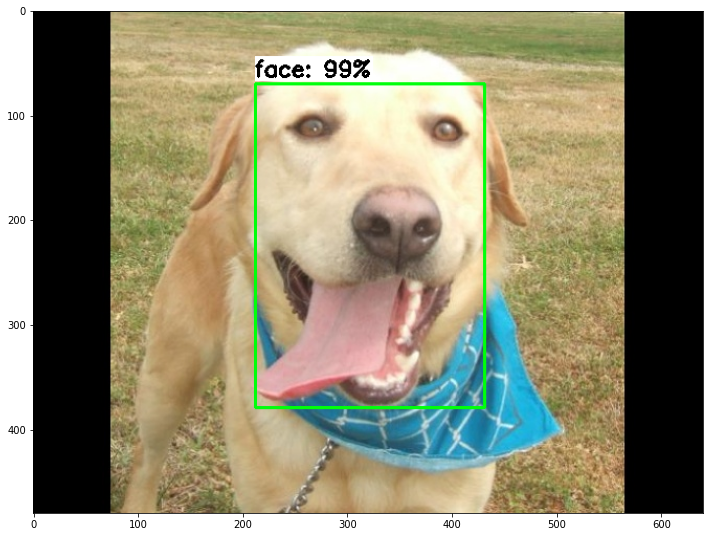

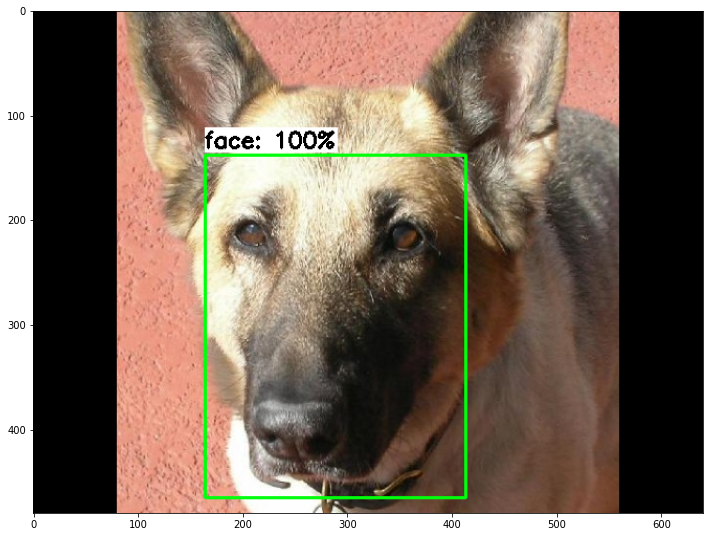

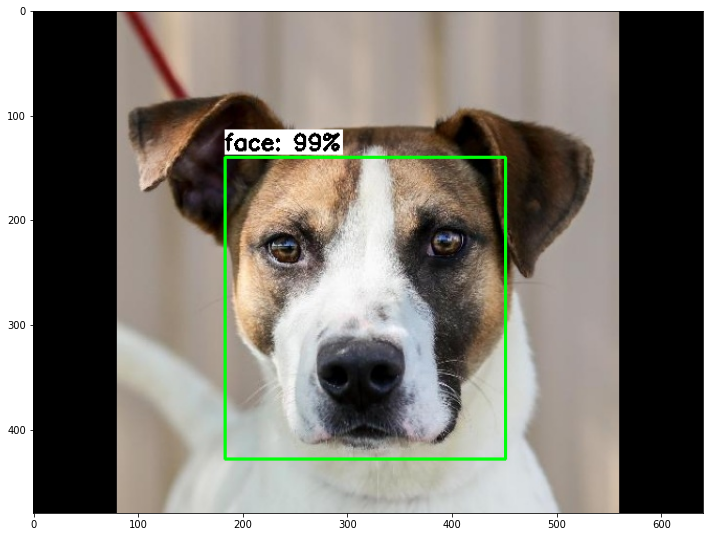

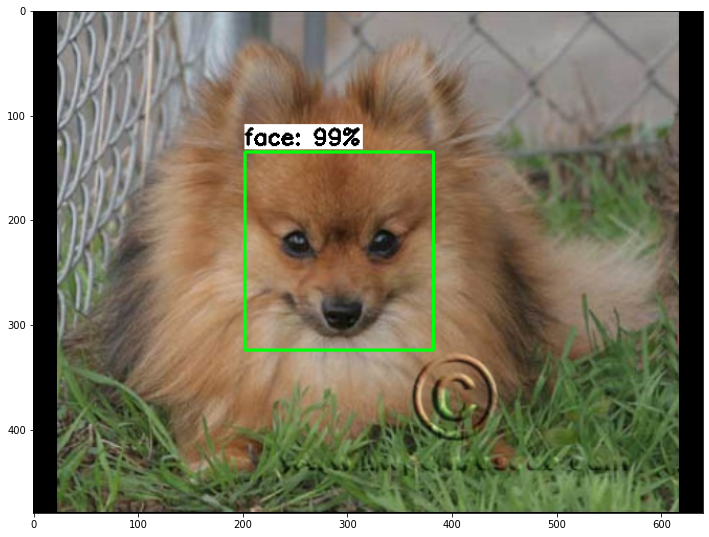

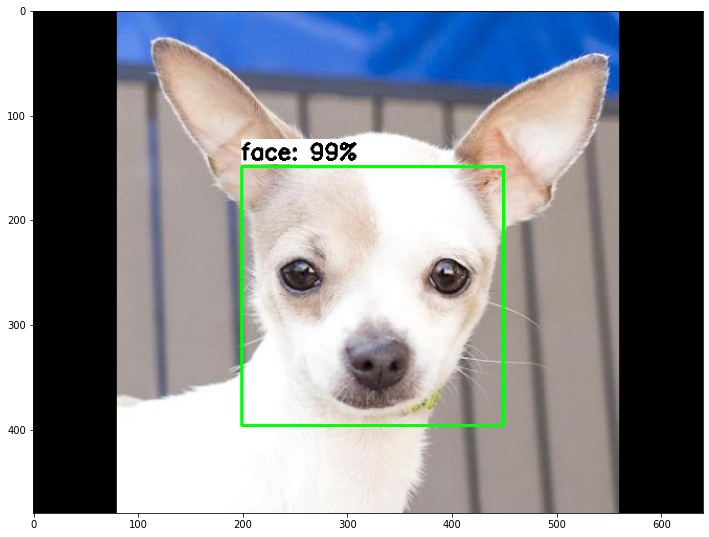

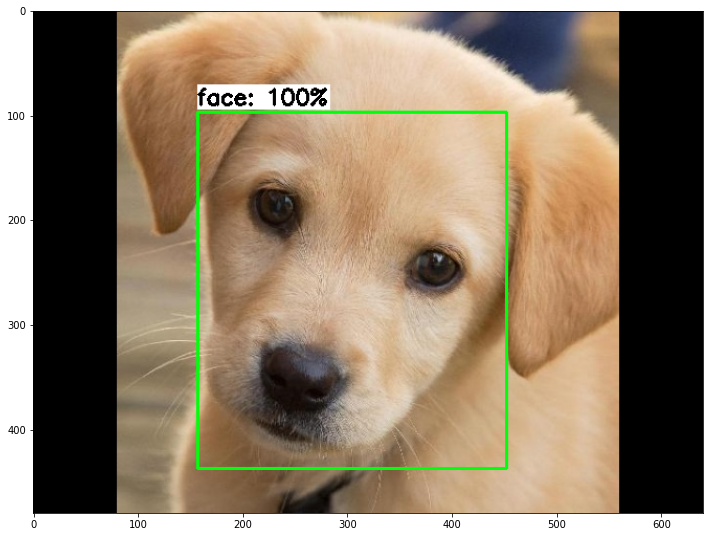

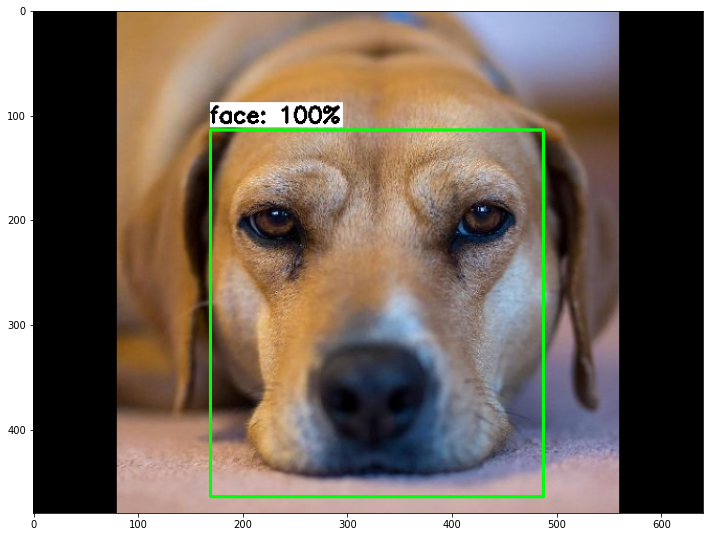

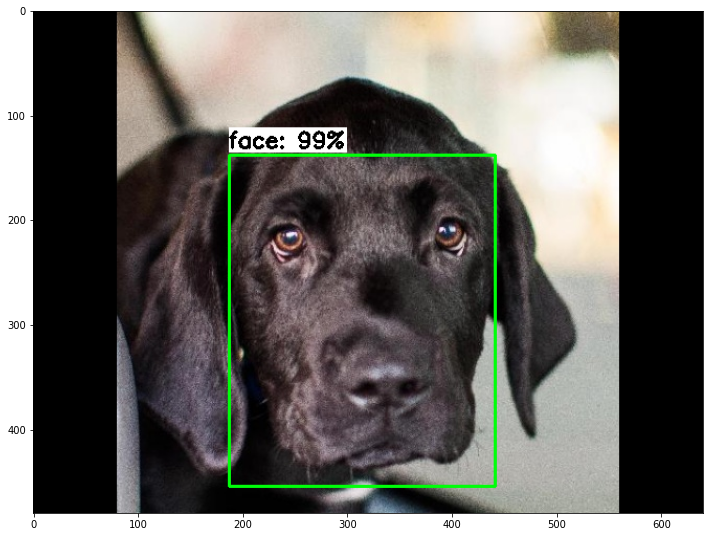

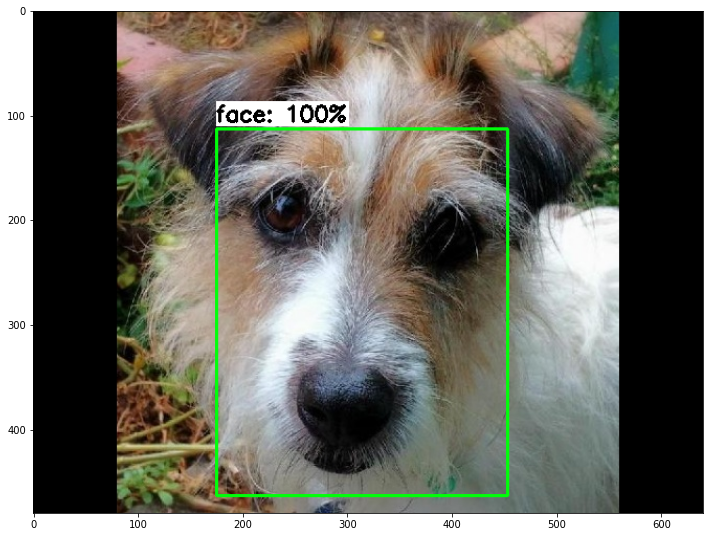

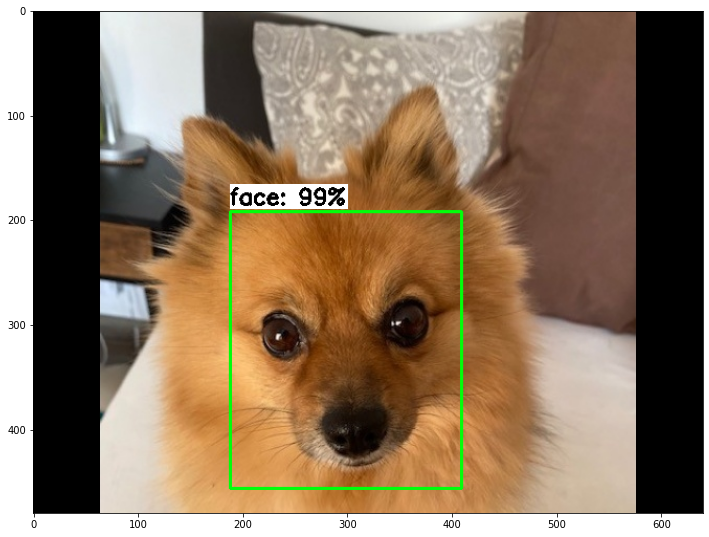

In [ ]:
# Set up variables for running user's model
PATH_TO_IMAGES='/content/images/test'   # Path to test images folder
PATH_TO_MODEL='/content/custom_model_lite/detect.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/content/labelmap.txt'   # Path to labelmap.txt file
min_conf_threshold=0.80   # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test = 10   # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

In [ ]:
#download model
from google.colab import files
files.download('/content/custom_model_lite/detect.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>